In [6]:
## Voici notre super TP2, Ça part comme on dit
## Oh yes

from scipy import linalg
import numpy as np

## Question 1 - Une chaîne de résistors

### 1.

La loi des courants de Kirchhoff, aussi appelé loi de noeuds, nous dit que le courant total qui "arrive" dans un noeud est égal au courant total qui en sort. Mathématiquement, elle se traduit par:

$$I_1+I_2+...I_N=I_a+I_b+...I_M$$

Où les courants $1,2,3...N$ sont les courants entrants et les courants $a,b,c...M$ sont les courants sortant. Sachant la loi d'Ohm, soit:

$$V=RI$$

On peut exprimer le courant comme la différence de potentiel entre deux noeuds divisée par la résistance de la branche. Cela est utile dans un cas comme le nôtre puisque nous ne connaissons pas *a priori* le sens du courant. On peut donc écrire, par exemple, pour un noeud arbitraire $i$ entouré de noeuds arbitraires 1 à 3:

$$\frac{V_i-V_1}{R_1}+\frac{V_i-V_2}{R_2}+\frac{V_i-V_3}{R_3}=0$$

Si le potentiel du noeud $i$ est plus élevé que celui du noeud environnant, le courant "sortira" du noeud $i$, tandis que dans le cas contraire il y entrera; on constate qu'on a donc bel et bien la forme de la loi de Kirchhoff. Dans notre cas, étant donné que toutes les résistances sont identiques, on peut multiplier l'équation par $R$ pour n'avoir que les potentiels de chaque noeud dans l'équation.

Déterminons donc les équations dans notre système. En observant la figure, pour le noeud $1$, on a:

$$(V_1-V_+)+(V_1-V_2)+(V_1-V_3)=0$$
$$3V_1-V_2-V_3=V_+$$

Pour le noeud $2$:

$$(V_2-V_+)+(V_2-V_1)+(V_2-V_3)+(V_3-V_4)=0$$
$$-V_1-4V_2-V_3-V_4=V_+$$

À partir du noeud $3$, on arrive dans la zone des "noeuds centraux", c'est-à-dire que tous les noeuds sont semblables jusqu'à ce que nous arrivions à $N-1$. Déterminons donc les équations de $3$ et $4$ et voyons si on peut généraliser l'équation pour tous les noeuds allant jusqu'à $N-2$ inclusivement.

Pour le noeud $3$, on a:

$$(V_3-V_1)+(V_3-V_2)+(V_3-V_4)+(V_3-V_5)=0$$
$$-V_1-V_2+4V_3-V_4-V_5=0$$

Pour le noeud $4$, on a:

$$(V_4-V_2)+(V_4-V_3)+(V_4-V_5)+(V_4-V_6)=0$$
$$-V_2-V_3+4V_4-V_5-V_6=0$$

En observant ces équations ainsi que le schéma, on peut généraliser pour un noeud arbitraire $i$ où $2<i<N-1$:

$$-V_{i-2}-V_{i-1}+4V_i-V_{i+1}-V_{i+2}=0$$

Pour les deux derniers noeuds, $N-1$ et $N$, on a le "miroir" des noeuds $1$ et $2$. En se référant au schéma, on remarque qu'on a les équations suivantes:

Noeud $N-1$:

$$(V_{N-1}-V_{N-3})+(V_{N-1}-V_{N-2})+(V_{N-1}-V_{N})+(V_{N-1}-0)=0$$
$$-V_{N-3}-V_{N-2}+4V_{N-1}-V_N=0$$

Noeud $N$:

$$(V_N-V_{N-2})+(V_{N}-V_{N-1})+(V_{N}-0)=0$$
$$-V_{N-2}-V_{N-1}+3V_N=0$$

On obtient donc le système d'équations suivant:

\begin{align*}
3V_1-V_2-V_3&=V_+\\
-V_1+4V_2-V_3-V_4&=V_+\\
&\vdots\\
-V_{i-2}-V_{i-1}+4V_i-V_{i+1}-V_{i+2}&=0\\
&\vdots\\
-V_{N-3}-V_{N-2}+4V_{N-1}-V_N&=0\\
-V_{N-2}-V_{N-1}+3V_N&=0
\end{align*}

C.Q.F.D.

### 2.

On peut mettre ces équations sous forme matricielle, soit:

$$\mathbf{Av}=\mathbf{w}$$

Où $\mathbf{A}$ est la matrice des coefficients, $\mathbf{v}$ la matrice des tensions, et $\mathbf{w}$ la matrice des côtés droits des équations précédemment déterminées. Alors on a:

\begin{bmatrix}
3&-1&-1&0&0&0&0&0&\dots&&&&&&0\\
-1&4&-1&-1&0&0&0&0&\dots&&&&&&0\\
-1&-1&4&-1&-1&0&0&0&\dots&&&&&&0\\
0&-1&-1&4&-1&-1&0&0&\dots&&&&&&0\\
\vdots&&&&&&&&\dots&&&&&&\vdots\\
0&\dots&&&&0&-1&-1&4&-1&-1&\dots&&&0\\
\vdots&&&&&&&&\dots&&&&&&\vdots\\
0&&&&&\dots&0&0&0&0&0&-1&-1&4&-1\\
0&&&&&\dots&0&0&0&0&0&0&-1&-1&3\\
\end{bmatrix}\begin{bmatrix}V_1\\V_2\\V_3\\V_4\\\vdots\\V_i\\\vdots\\V_{N-1}\\V_{N-2}\end{bmatrix}=\begin{bmatrix}V_+\\V_+\\0\\0\\\vdots\\0\\\vdots\\0\\0\end{bmatrix}

Dans le cas où $N=6$, on obtient le système suivant:

\begin{bmatrix}
3&-1&-1&0&0&0\\
-1&4&-1&-1&0&0\\
-1&-1&4&-1&-1&0\\
0&-1&-1&4&-1&-1\\
0&0&-1&-1&4&-1\\
0&0&0&-1&-1&3
\end{bmatrix}\begin{bmatrix}V_1\\V_2\\V_3\\V_4\\V_5\\V_6\end{bmatrix}=\begin{bmatrix}V_+\\V_+\\0\\0\\0\\0\\\end{bmatrix}

On souhaite écrire un programme capable de résoudre un tel système. On utilisera la fonction *solve* de scipy: cette fonction native de scipy est faite pour résoudre de tels systèmes, sera probablement plus efficace que celle que nous pourrions coder nous-mêmes, et nous permettra de conclure sur l'utilité de *solve* à $N=10000$. Débutons par créer un programme qui génère les matrices $\mathbf{A}$ et $\mathbf{w}$:

In [123]:
# But: générer les matrices A et w en vue de résoudre le système
# Argument:
# N: nombre de noeuds du système
# V: valeur en volts de V+

# À noter que le code ne fonctionne pas pour les matrices avec N < 4

def matrices(N, V):
    A = np.zeros((N,N))
    b = np.zeros((N,1))

    b[0,0], b[1,0] = V, V

    A[0,0:3] = [3, -1, -1]
    A[1,0:4] = [-1, 4, -1, -1]

    for n in range(N-4):
        A[n+2,n:(n+5)] = [-1, -1, 4, -1, -1]
    
    A[N-2, N-4:N] = [-1, -1, 4, -1]
    A[N-1, N-3:N] = [-1, -1, 3]

    return A, b

On écrit maintenant un script pour résoudre la matrice ainsi obtenue. Débutons avec la matrice pour $N=6$:

In [139]:
# La fonction linalg.solve accepte deux paramètres obligatoires sous la forme
# linalg.solve(a,b), où a est la matrice des coefficients (A plus haut)
# et b est la matrice du côté droit des équations (w plus haut)

N = 6
V = 5

A, b = matrices(N, V)

x = linalg.solve(A, b)

print(f"La matrice de tensions pour un système à {N} noeuds est:\n",x)

La matrice de tensions pour un système à 6 noeuds est:
 [[3.7254902 ]
 [3.43137255]
 [2.74509804]
 [2.25490196]
 [1.56862745]
 [1.2745098 ]]


Pour générer un graphique des potentiels selon l'indice du noeud, on transforme l'*array* en liste et on génère une liste d'indices, puis on fait le graphique:

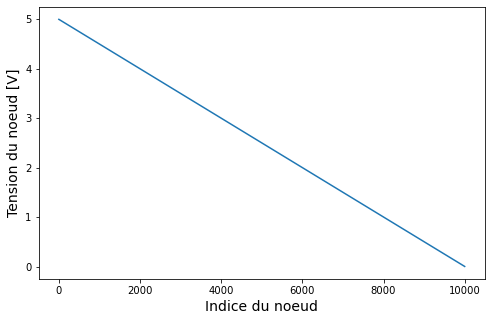

In [47]:
import matplotlib.pyplot as plt

def V_vs_noeud(N,V):

    A, b = matrices(N,V)
    x = linalg.solve(A, b)
    x = [e for n in x.tolist() for e in n]
    i = [n+1 for n in range(N)]

    V_vs_noeud_fig = plt.figure(figsize=(8,5))
    #plt.scatter(i, x)
    plt.plot(i, x)
    plt.xlabel('Indice du noeud', fontsize=14)
    plt.ylabel("Tension du noeud [V]", fontsize=14)
    plt.show()

V_vs_noeud(10000,5)

On peut tenter de résoudre le système à l'aide de solve pour $N=10000$ noeuds:

In [45]:
A, b = matrices(10000, 5)

x = linalg.solve(A, b)

On constate que le temps d'éxécution a beaucoup augmenté: il a fallu presque 8 secondes afin de résoudre le système. Cela est dû au fait que, lorsque la matrice $\mathbf{A}$ est très grande, il y a énormément d'éléments (surtout des 0), ce qui rend le système long à traiter. On peut utiliser le fait que la matrice est en bande, c'est-à-dire qu'il y a une bande de 5 éléments qui se répète diagonalement tout le long de la matrice. On peut employer la fonction *banded* du Newman pour résoudre plus efficacement. Cette fonction est donnée dans l'annexe E.2 comme suit:

In [56]:
# Fonction banded tirée de l'annexe E.2 du Newman
# But: résoudre plus efficacement un système d'équations avec une matrice A à bande
# Arguments:
# Aa: matrice de coefficients
# va: matrice du côté droit du système d'équations
# up: nombre d'éléments non nuls au-dessus de la diagonale
# down: nombre d'éléments non nuls sous la diagonale

from numpy import copy

def banded(Aa,va,up,down):

    # Copy the inputs and determine the size of the system
    A = copy(Aa)
    v = copy(va)
    N = len(v)

    # Gaussian elimination
    for m in range(N):

        # Normalization factor
        div = A[up,m]

        # Update the vector first
        v[m] /= div
        for k in range(1,down+1):
            if m+k<N:
                v[m+k] -= A[up+k,m]*v[m]

        # Now normalize the pivot row of A and subtract from lower ones
        for i in range(up):
            j = m + up - i
            if j<N:
                A[i,j] /= div
                for k in range(1,down+1):
                    A[i+k,j] -= A[up+k,m]*A[i,j]

    # Backsubstitution
    for m in range(N-2,-1,-1):
        for i in range(up):
            j = m + up - i
            if j<N:
                v[m] -= A[i,j]*v[j]

    return v

Ici, en observant la forme générale de matrice obtenue au 1, on remarque qu'il y a deux éléments non nuls au-dessus de la diagonale, et deux éléments non nuls sous la diagonale (*up*=*down*=2). Cependant, on doit d'abord formater la matrice $\mathbf{A}$ pour qu'elle concorde avec la forme donnée dans le Newman (voir Figure 2). Pour ce faire, on peut remarquer qu'on a simplement à "glisser" les éléments non nuls de chaque colonne à la bonne position. Nous n'avons pas besoin de remplacer les autres éléments par des zéros une fois l'opération terminée car, selon Newman, "The values in the elements marked "-" do not matter-you can put anything  in these elements and it will make no difference to the results". Il faut ensuite retourner la matrice formattée en gardant seulement les 5 dernières lignes:

In [157]:
def format_A(A):
    n = 3
    N = len(A)
    for col in range(N):
        i = np.nonzero(A[:,col])[0]
        #print(i)
        minimum = min(i)
        maximum = max(i)
        #print(minimum)
        #print(maximum)
        slide = A[minimum:(maximum+1),col]

        A[minimum+(N-n):maximum+(N-n+1),col] = slide
        #A[minimum:(maximum+1),col] = 0
        n += 1
        #print(A)
    
    return(A[-5:])

On peut maintenant employer la fonction *banded* pour résoudre le système à $N=10000$ noeuds.

In [174]:
import timeit

A, v = matrices(10000, 5)
A = format_A(A)

t1 = timeit.default_timer()
x = banded(A, v, 2, 2)
t2 = timeit.default_timer()

print(x)
print(f"Résolution avec banded: {t2-t1} secondes")

[[4.99888228e+00]
 [4.99861842e+00]
 [4.99802841e+00]
 ...
 [1.97158611e-03]
 [1.38158071e-03]
 [1.11772227e-03]]
Résolution avec banded: 0.6109193000011146 secondes


On constate qu'on arrive à la solution beaucoup plus rapidement avec la fonction *banded* (moins d'une seconde versus environ 9 secondes pour *solve*. Même en comptant le temps de reformater la matrice, on a besoin de seulement 5 secondes avec la méthode *banded*). Pour 10000 noeuds, la méthode solve prend environ 18 fois plus de temps. On peut donc imaginer que, pour des systèmes beaucoup plus grands, l'efficacité de la fonction banded permettra de sauver beaucoup de temps. Essayons avec $N=15000$ (à noter que l'allocation maximale de mémoire de VSCode est d'environ 2 Gigaoctets, ce qui fait en sorte qu'il n'est pas possible d'essayer avec des matrices de taille beaucoup supérieure étant donné qu'on atteint 2 GB de préallocation pour une matrice d'environ $N=16000$)

In [177]:
import timeit

N = 15000
V = 5
A, b = matrices(N, V)

t1 = timeit.default_timer()
x = linalg.solve(A, b)
t2 = timeit.default_timer()

print(f"Le temps pour résoudre un système de 100000 noeuds avec la fonction solve est de {t2-t1} secondes")

A = format_A(A)
t1 = timeit.default_timer()
x = banded(A, b, 2, 2)
t2 = timeit.default_timer()

print(f"Le temps pour résoudre un système de 100000 noeuds avec la fonction solve est de {t2-t1} secondes")

MemoryError: Unable to allocate 1.68 GiB for an array with shape (15000, 15000) and data type float64

En observant la forme de l'équation de Schrödinger obtenue pour la série de Fourier d'un état, on décide de poser des éléments de matrice $H_{mn}$ de la façon suivante :
$$H_{mn} = \frac{2}{L}\int_0^L\sin\frac{m\pi x}{L}\hat{H}\sin\frac{n\pi x}{L}\text{d}x$$

Cette définition nous permet de réécrire l'éqauation de Schrödinger sous une forme matricielle. En insérant $H_{mn}$ dans l'équation dérivée plus haut, on a
$$\sum_{n=1}^{\infty} \psi_n\frac{L}{2}H_{mn} = \frac{1}{2}LE\psi_m$$
$$\sum_{n=1}^{\infty} H_{mn} \psi_n = E\psi_m$$
On remarque que la partie gauche de l'équaiton correspond à une étape de la mutliplication matricielle de $\boldsymbol{H}$ et de $\boldsymbol{\psi}$ où on trouve l'élément $\psi_m$ de la matrice résultante. On remarque aussi que chaque élément de la matrice résultante est simplement l'élément de la matrice $\psi(x)$ multiplié par le facteur $E$. On voit donc que l'équation trouvée implique l'équation aux valeurs propres suivante :
$$\boldsymbol{H}\boldsymbol{\psi} = E\boldsymbol{\psi}$$
En définissant les éléments de la matrice $H$ de cette façon, on obtient donc que l'état $\psi(x)$ est un vecteur propre de l'Hamiltonien associé à la valeur propre E.

$$\textcolor{red}{\text{Ajouter du stock?}}

## Question 5

On sait que l'Hamiltonien correspond à :
$$\frac{-\hbar}{2M}\frac{\text{d}^2}{\text{d}x^2} + \frac{ax}{L}$$